In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)


In [2]:
engine.dispose()

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#1 Are the exam score variables normally distributed? If not, 
#apply a Box-Cox transformation. Does anything change?

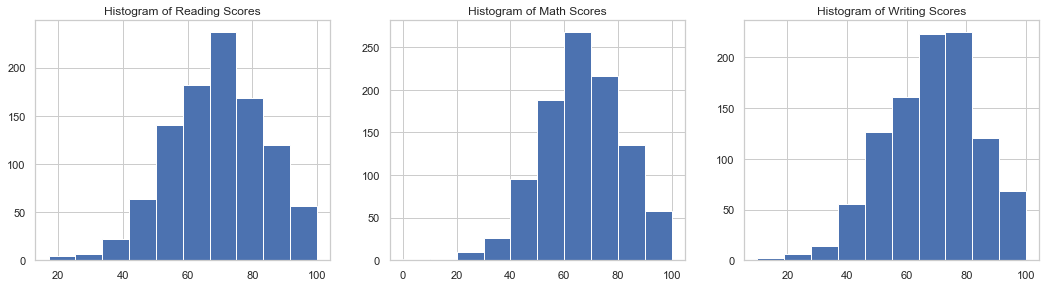

In [6]:
plt.figure(figsize=(18,15))


#histograms of the original data 
plt.subplot(3,3,1)
plt.hist(student_df["reading score"])
plt.title("Histogram of Reading Scores")

plt.subplot(3,3,2)
plt.hist(student_df["math score"])
plt.title("Histogram of Math Scores")

plt.subplot(3,3,3)
plt.hist(student_df["writing score"])
plt.title("Histogram of Writing Scores")

plt.show()

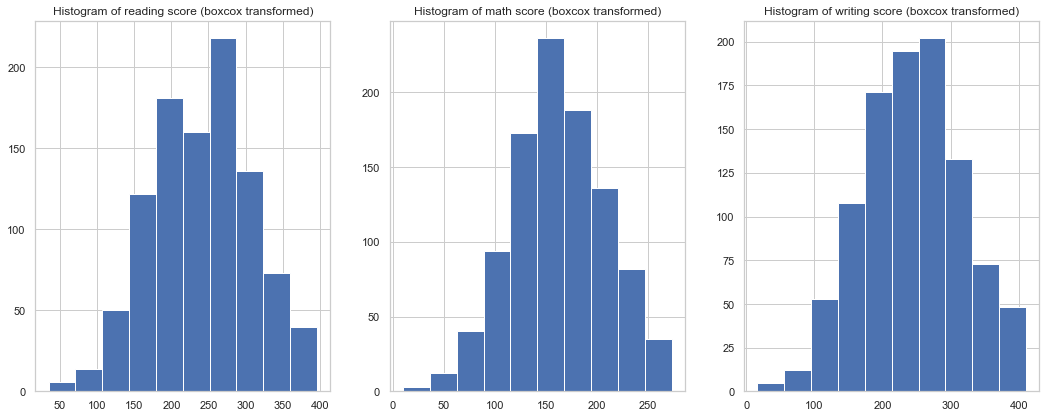

In [12]:
from scipy.stats import boxcox

reading_score_boxcox,_ = boxcox(student_df["reading score"])
math_score_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
writing_score_boxcox,_ = boxcox(student_df["writing score"])

plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
plt.hist(reading_score_boxcox)
plt.title("Histogram of reading score (boxcox transformed)")

plt.subplot(2,3,2)
plt.hist(math_score_boxcox)
plt.title("Histogram of math score (boxcox transformed)")

plt.subplot(2,3,3)
plt.hist(writing_score_boxcox)
plt.title("Histogram of writing score (boxcox transformed)")

plt.show()


In [ ]:
##the data becomes more normally distributed, less skewed 

In [ ]:
#2 Say we want to use a single variable for the exam scores as our target.
#For this purpose, create a new variable by taking a weighted average of 
#the exam scores. Check whether this new variable is normally distributed. 
#If it's not normally distributed, apply a Box-Cox transformation and 
#check whether or not the transformed variable is normally distributed.

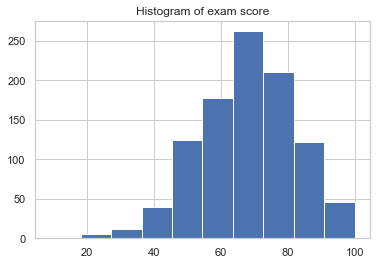

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

exam_score = (student_df["math score"] + student_df["reading score"] + student_df["writing score"])/3

plt.hist(exam_score)
plt.title("Histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

In [ ]:
#there is some skewness and it is not normally distributed

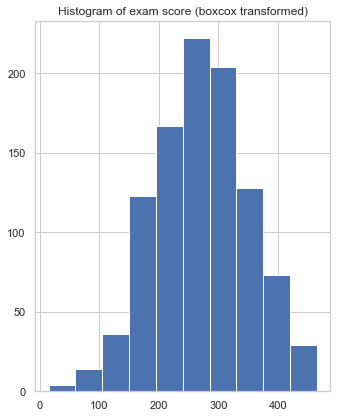

In [21]:
exams_boxcox, _ = boxcox(exam_score)

plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
plt.hist(exams_boxcox)
plt.title("Histogram of exam score (boxcox transformed)")

plt.show()

In [23]:
jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [24]:
#3 Which variables do seem to be related with the target variable 
#(the newly created variable in the previous question)? If our goal 
#is to explain the determinants of the success in the exams, which 
#variables in our dataset might be useful?

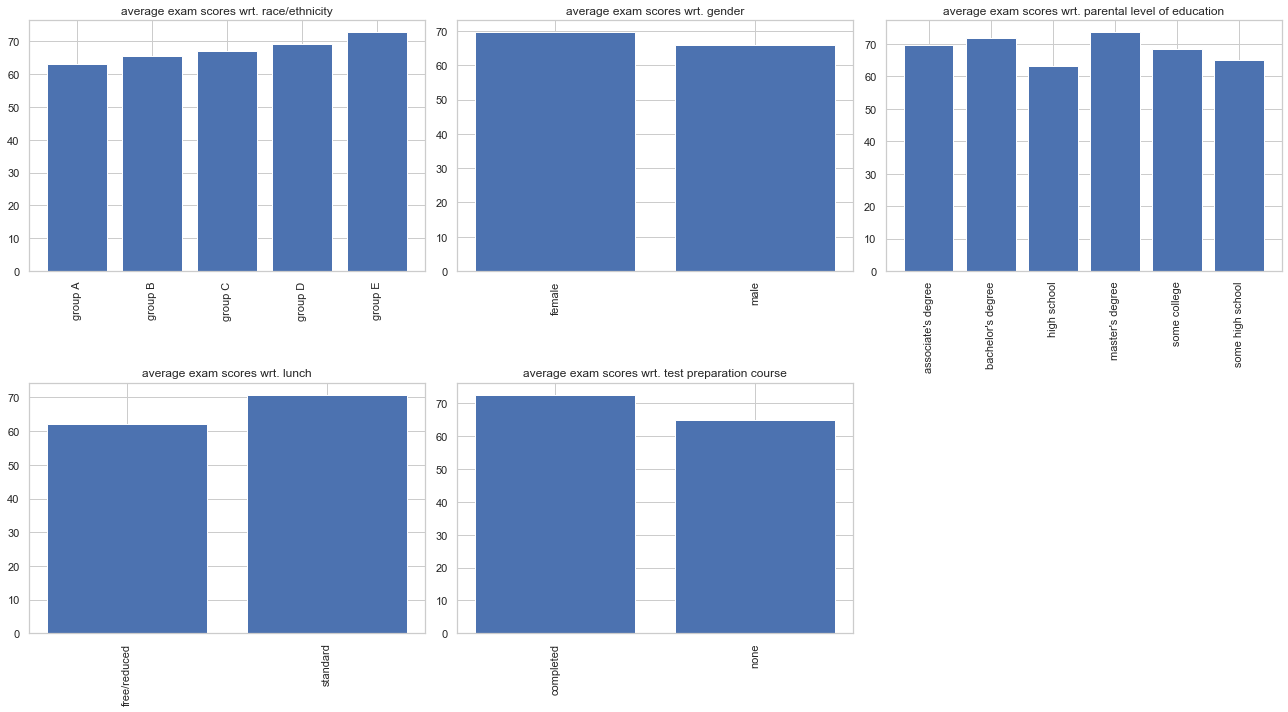

In [30]:
student_df["exam_score"] = exam_score 

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.bar(student_df.groupby("race/ethnicity")
["exam_score"].mean().index, student_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")
    
plt.subplot(2,3,2)
plt.bar(student_df.groupby("gender")
["exam_score"].mean().index, student_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")    
    
plt.subplot(2,3,3)
plt.bar(student_df.groupby("parental level of education")
["exam_score"].mean().index, student_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2,3,4)
plt.bar(student_df.groupby("lunch")
["exam_score"].mean().index, student_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2,3,5)
plt.bar(student_df.groupby("test preparation course")
["exam_score"].mean().index, student_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

In [ ]:
#Group E shows more success in exams 
#Female show more success 
#A student with parents with a master's degree shows more success
#standard lunch shows more success in exams 
#and those who completed test prep courses showed more success